In [30]:
# data preprocessing
import pandas as pd

# get total streaming history (earliest to latest dates)
strm_hist_0 = pd.read_json('data/StreamingHistory0.json')
strm_hist_1 = pd.read_json('data/StreamingHistory1.json')

strm_hist_total = pd.concat([strm_hist_0, strm_hist_1])

strm_hist_total

,endTime,artistName,trackName,msPlayed
0,2022-12-17 07:06,keshi,skeletons,148449
1,2022-12-23 23:56,Kassy,Aching,74929
2,2022-12-25 00:52,DPR LIVE,Jasmine,6816
3,2022-12-25 00:56,Kassy,Aching,242048
4,2022-12-26 01:08,Kassy,Aching,176095
...,...,...,...,...
5557,2023-12-24 04:34,Clinton Kane,AVO TOAST,161461
5558,2023-12-24 04:37,Jessica Baio,at least,167502
5559,2023-12-24 04:41,Ed Sheeran,Merry Christmas,208546
5560,2023-12-24 04:44,Zach Hood,lonely isn't the word for this,167060


In [31]:
# data preprocessing continued

# get only the 2023 dates
# sort by date
current_year = strm_hist_total.sort_values(by='endTime')

# convert to datetime since it has an extended time format (y/m/d AND hr/min)
current_year['endTime'] = pd.to_datetime(current_year['endTime'], format='%Y-%m-%d %H:%M') 

# keep only the years, in a String format, to make filtering easier
current_year['endTime'] = current_year['endTime'].dt.strftime('%Y') 

# drop all rows with year 2022 (returns the indexes of the rows w/ year 2022)
index_of_drop_rows = current_year[
    # specify 2022 as a string not an integer 
    # b/c the years are now String objects (b/c of strftime)
    current_year['endTime'] == '2022' 
].index

current_year.drop(index_of_drop_rows, inplace=True)

current_year.head()

,endTime,artistName,trackName,msPlayed
74,2023,WINTER,ONCE AGAIN,41817
73,2023,AILEE,I′m Sorry,256173
75,2023,TWICE,Basics,176973
76,2023,Wonstein,Your Existence,204229
77,2023,iKON,LOVE SCENARIO,209648


In [81]:
# data preprocessing continued (part 3)

# get rid of the podcasts

# sort by the time played, longest to shortest
# in theory, podcasts should have the longest times, so sorting should allow us to see all 
sort_by_played = current_year.sort_values(by='msPlayed', ascending=False)

# drop the first 5 rows b/c they're podcasts
played_drop_five = sort_by_played.iloc[5:] 

# drop the second row b/c also podcast
songs_only = played_drop_five.drop(9909)

songs_only


,endTime,artistName,trackName,msPlayed
6660,2023,Hozier,Eat Your Young,472904
360,2023,Jay Chou,稻香,393730
7408,2023,JUNNY,MOVIE,361556
4221,2023,Gracie Abrams,Right now,350836
9640,2023,Sabrina 胡恂舞,You were.,328347
...,...,...,...,...
1013,2023,Tate McRae,you're so cool,0
5361,2023,TRI.BE,WONDERLAND - English Ver.,0
1014,2023,Swedish House Mafia,Moth To A Flame (with The Weeknd),0
4549,2023,Tate McRae,greedy,0


In [50]:
# the basic questions

# top 5 artists?
all_artists = current_year['artistName'].value_counts() # currently a Series

# set a name for the first column (rename_axis) and rename the second column (reset_index)
all_artists_renamed = all_artists.rename_axis('Artist').reset_index(name='Number of Tracks Played')

# create new dataframe with the top 5 results only
top_5_artists = all_artists_renamed.loc[:4]

top_5_artists_ascending = top_5_artists.sort_values(by='Number of Tracks Played', ascending=True)


In [34]:
# total minutes listened?
import math

total_milisecs = current_year['msPlayed'].sum() # in milliseconds
total_secs = math.floor(total_milisecs/1000) # get seconds

print(f'{math.floor(total_secs/60)} minutes {round(total_secs % 60)} seconds') 

40399 minutes 51 seconds


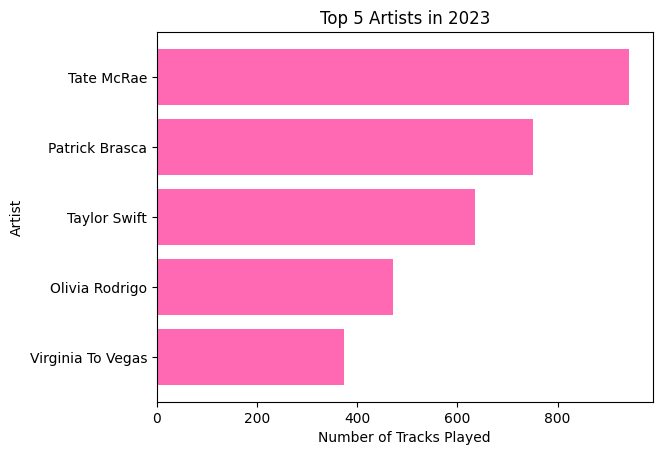

In [53]:
# data visualization
import matplotlib.pyplot as plt

# top 5 artists
plt.title('Top 5 Artists in 2023')
plt.xlabel('Number of Tracks Played')
plt.ylabel('Artist')
plt.barh(top_5_artists_ascending['Artist'], 
         top_5_artists_ascending['Number of Tracks Played'],
         color='hotpink')

# total minutes listened


plt.show()
